In [38]:
from fastai import *
from fastai.vision import *

In [39]:
var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
hiddenElement.target = '_blank';
hiddenElement.download = 'myFile.txt';
hiddenElement.click();

SyntaxError: invalid syntax (<ipython-input-39-794b673fcf7b>, line 1)

In [4]:
folder = 'black'
file = 'black.txt'

In [7]:
folder = 'teddys'
file = 'teddys.txt'

In [10]:
folder = 'grizzly'
file = 'grizzly.txt'

In [11]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
download_images(path/file, dest, max_pics=200)

In [40]:
classes = ['teddys','grizzly','balck']

In [41]:
for c in classes:
    print(c)
    verify_images(path/c, delet=True, max_workers=8)

teddys


grizzly


balck


In [42]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [43]:
data.classes

['black', 'grizzly', 'teddys']

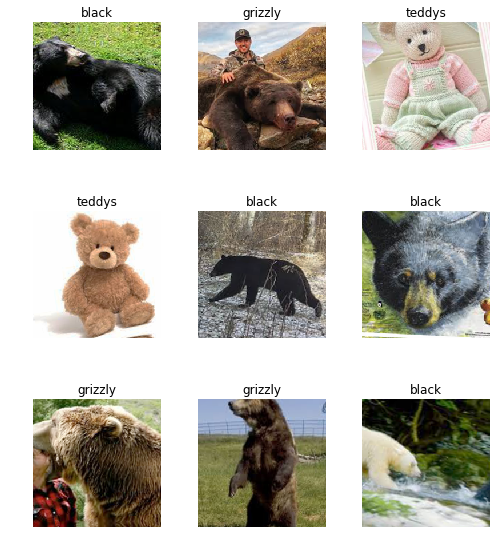

In [44]:
data.show_batch(rows=3, figsize=(7,8))

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 192, 48)

In [46]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [47]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.581525,0.162510,0.062500,01:20
1,0.899698,0.221755,0.083333,01:23
2,0.610089,0.232252,0.062500,01:26
3,0.457433,0.212476,0.062500,01:21


In [48]:
learn.save('stage-1')

In [49]:
learn.unfreeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


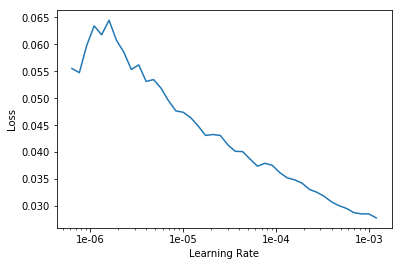

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.079692,0.130833,0.041667,01:42
1,0.061403,0.151120,0.041667,01:46


In [60]:
learn.save('stage-2')

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 655, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/anaconda3/lib/python3.7/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 75, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


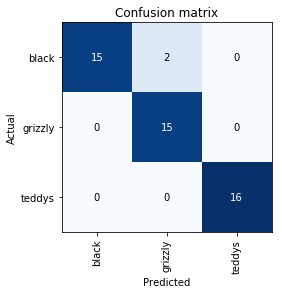

In [55]:
interp.plot_confusion_matrix()

In [56]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [57]:
data.classes

['black', 'grizzly', 'teddys']

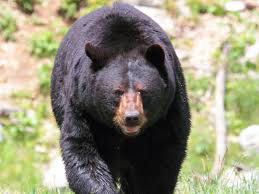

In [58]:
img = open_image(path/'black'/'00000021.jpg')
img

In [62]:
classes = ['black', 'grizzly','teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Ba

In [63]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(2)